In [24]:
"""
COSC 525 - Deep Learning
Project #3: Building Networks with Tensorflow and Keras
Contributors: Anna-Maria Nau and Christoph Metzner
Date: 03/10/20
"""
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.metrics import confusion_matrix

# Import other libraries
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.utils import to_categorical

# Import Fashion-Mnist Dataset from Keras and Preprocess Dataset

In [25]:
# Import fashion-mnist dataset from
# https://keras.io/datasets/#fashion-mnist-database-of-fashion-articles
# Downloads the data, will take some time so make yourself some tea!
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Change format of label dataset --> from 1 to [0,1,0,0,0,0,0,0,0,0]
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# from https://www.tensorflow.org/tutorials/keras/classification
# creat list with all respective class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [6]:
# Get min, and max value from training data set using all 60,000 samples
max_val = x_train.max()
print("Maximal value: ", max_val)
min_val = x_train.min()
print("Minimum value: ", min_val)


Maximal value:  255
Minimum value:  0


In [7]:
# Init a normalization funciton
def normalization(matrix, max_val, min_val):
    new_matrix = np.array([((image - min_val)/(max_val-min_val)) for image in matrix])
    return new_matrix

In [8]:
# Normalize training (x_train) and testing (x_test) datasets based on maximal and minimal values of the training dataset
x_train_scaled = normalization(x_train, max_val, min_val)
x_test_scaled = normalization(x_test, max_val, min_val)

# Show normalized image matrix and original matrix
print(x_train_scaled[10])
print(x_train[10])
print(x_train.shape)
print(x_train_scaled.shape)

[[0.         0.         0.         0.         0.         0.
  0.         0.04313725 0.55686275 0.78431373 0.41568627 0.
  0.         0.         0.         0.         0.         0.
  0.33333333 0.7254902  0.43921569 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.59607843 0.83921569 0.85098039 0.76078431 0.9254902  0.84705882
  0.73333333 0.58431373 0.52941176 0.6        0.82745098 0.85098039
  0.90588235 0.80392157 0.85098039 0.7372549  0.13333333 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.25882353
  0.7254902  0.65098039 0.70588235 0.70980392 0.74509804 0.82745098
  0.86666667 0.77254902 0.57254902 0.77647059 0.80784314 0.74901961
  0.65882353 0.74509804 0.6745098  0.7372549  0.68627451 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.52941176
  0.6        0.62745098 0.68627

In [9]:
reshaped_x_train_scaled = np.reshape(x_train_scaled,(60000,28,28,1))
reshaped_x_test_scaled = np.reshape(x_test_scaled,(10000,28,28, 1))

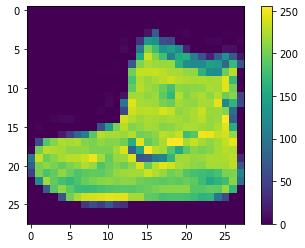

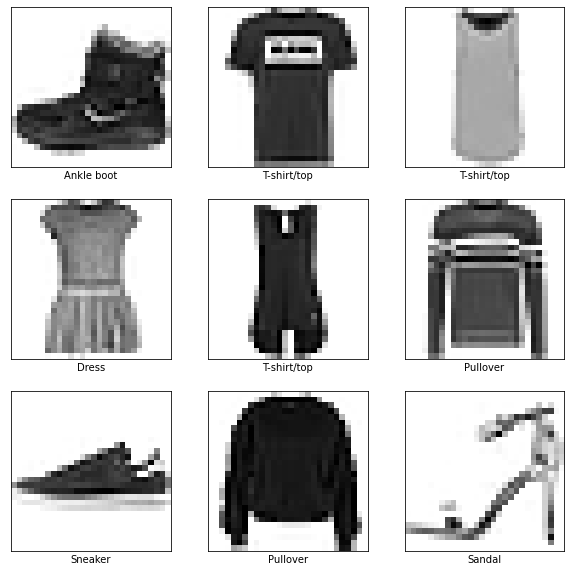

In [7]:
# from https://www.tensorflow.org/tutorials/keras/classification

# Plot first image of the training dataset
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()
##########

# Plot the first images plus their labels 
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [10]:
# from https://stackoverflow.com/questions/43178668/record-the-computation-time-for-each-epoch-in-keras-during-model-fit
# Class which enables to store the execution time per epoch
class TimeHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

In [11]:
def acc_time(time_stamps):
   # accumulate all single time values
    accumulated_time = []
    acc_time = 0
    for time in time_stamps:
        acc_time += time
        accumulated_time.append(acc_time)
    #print(accumulated_time)   
    return accumulated_time
    

In [12]:
def run_model(model, x_train, y_train, x_test, y_test, class_names):
    print(model.summary())
    print()
    # compile the given model architecture
    model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # call class for taking time stamps for each epoch
    time_callback_train = TimeHistory()
    
    # fit the model (train the network) and save metrics in variable history
    history = model.fit(x_train, y_train, epochs=50, batch_size=200, callbacks=[time_callback_train])
    
    # store time stamps per epoch in variable
    times_train = time_callback_train.times
    print()
    print("Reported times per epoch: \n ", times_train)
    
    accumulated_time = acc_time(times_train)
    
    # Evaluate model using testing dataset
    test_start_time = time.time()
    test_loss, test_acc = model.evaluate(x_test, y_test, batch_size=200, verbose=2)
    print()
    print()
    print('Test Loss: {} and Test Accuracy: {}'.format(test_loss, test_acc))
    test_end_time = time.time() - test_start_time
    print('Time for Testing Data: ', test_end_time)
    
    
    # show plots
    # Plot training accuracy values vs epochs
    plt.plot(history.history['accuracy'])
    plt.title('Model accuracy vs Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training loss values vs epochs
    plt.plot(history.history['loss'])
    plt.title('Model loss vs Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training time vs epochs
    plt.plot(accumulated_time, history.history['loss'])
    plt.title('Model Loss vs Time')
    plt.ylabel('Loss')
    plt.xlabel('Time in seconds')
    plt.legend(['Train'], loc='upper left')
    plt.show()
    
    return history

In [13]:
def conf_mat(model, x_test, y_test):
    # Generate prediction output from model using scaled testing dataset
    # Using keras predict_classes
    predictions = model.predict_classes(x_test, verbose=2)

    # Creating the confusion matrix using sklearn library
    conf_matrix = confusion_matrix(y_test, predictions)
    # Changing confusing matrix output using pandas library
    conf_matrix = pd.DataFrame(conf_matrix)
    conf_matrix
    # Changing index / columns names to class names of output
    conf_matrix.columns = class_names
    conf_matrix.index = class_names
    
    return(conf_matrix)

# Task 1: Fully Connected Neural Network

In [12]:
# Create the model
FC_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28), name="FC_Input_Layer"),
    keras.layers.Dense(784, activation='tanh', name="FC_Hidden_Layer_1"),
    keras.layers.Dense(512, activation='sigmoid',name="FC_Hidden_Layer_2"),
    keras.layers.Dense(100, activation='relu', name="FC_Hidden_Layer_3"),
    keras.layers.Dense(10, activation='softmax', name="FC_Output_Layer")],
    name='Fully_Connected_NN')

# Task 2: Small Convolutional Neural Network

In [13]:
Small_CNN = Sequential()
Small_CNN.add(layers.Conv2D(filters=40, kernel_size=(5,5),strides=5,padding='valid', activation='relu', input_shape=(28, 28, 1)))
Small_CNN.add(layers.MaxPooling2D((2, 2)))
Small_CNN.add(layers.Flatten())
Small_CNN.add(layers.Dense(100, activation='relu'))
Small_CNN.add(layers.Dense(10, activation='softmax'))

# Task 3: Bigger Convolutional Neural Network

In [14]:
# Built the CNN architecture
bigger_CNN = Sequential(name='Bigger_CNN')
bigger_CNN.add(layers.Conv2D(filters=48, kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
bigger_CNN.add(layers.MaxPooling2D((2,2,)))
bigger_CNN.add(layers.Conv2D(filters=96, kernel_size=(3,3), strides=1, padding='valid', activation='relu'))
bigger_CNN.add(layers.MaxPooling2D((2,2,)))
bigger_CNN.add(layers.Flatten())
bigger_CNN.add(layers.Dense(100, activation='relu'))
bigger_CNN.add(layers.Dense(10, activation='softmax'))

# Task 4: Own Convolutional Neural Network

In [15]:
# Built the CNN architecture
own_CNN = Sequential(name='Own_CNN')
own_CNN.add(layers.Conv2D(filters=30, kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
own_CNN.add(layers.MaxPooling2D((2,2,)))
own_CNN.add(layers.Dropout(0.2))
own_CNN.add(layers.Flatten())
own_CNN.add(layers.Dense(100, activation='relu'))
own_CNN.add(layers.Dense(10, activation='softmax'))
own_CNN.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

# Task 5: Variational Auto Encoder

In [26]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import mse, binary_crossentropy
from keras.utils import plot_model
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
import argparse
import os

In [27]:
def plot_results(models,
                 data,
                 batch_size=128,
                 model_name="vae_mnist"):
    """Plots labels and MNIST digits as a function of the 2D latent vector

    # Arguments
        models (tuple): encoder and decoder models
        data (tuple): test data and label
        batch_size (int): prediction batch size
        model_name (string): which model is using this function
    """

    encoder, decoder = models
    x_test, y_test = data
    os.makedirs(model_name, exist_ok=True)

    filename = os.path.join(model_name, "vae_mean.png")
    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.savefig(filename)
    plt.show()

    filename = os.path.join(model_name, "digits_over_latent.png")
    # display a 30x30 2D manifold of digits
    n = 30
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-4, 4, n)
    grid_y = np.linspace(-4, 4, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n - 1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.savefig(filename)
    plt.show()

In [28]:
# reparameterization trick
# instead of sampling from Q(z|X), sample epsilon = N(0,I)
# z = z_mean + sqrt(var) * epsilon
def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.

    # Arguments
        args (tensor): mean and log of variance of Q(z|X)

    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

In [29]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255



In [30]:
# network parameters
input_shape = (original_dim, )
intermediate_dim = 512
batch_size = 200
latent_dim = 2
epochs = 50

In [32]:
# VAE model = encoder + decoder
# build encoder model
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
#plot_model(encoder, to_file='vae_mlp_encoder.png', show_shapes=True)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 512)          401920      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            1026        dense_7[0][0]                    
__________________________________________________________________________________________________
z_log_var (Dense)               (None, 2)            1026        dense_7[0][0]                    
____________________________________________________________________________________________

In [34]:
# build decoder model
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
#plot_model(decoder, to_file='vae_mlp_decoder.png', show_shapes=True)

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
z_sampling (InputLayer)      (None, 2)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1536      
_________________________________________________________________
dense_11 (Dense)             (None, 784)               402192    
Total params: 403,728
Trainable params: 403,728
Non-trainable params: 0
_________________________________________________________________


In [36]:
# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae_mlp')

In [37]:
#setting loss
reconstruction_loss=mse(inputs,outputs)
reconstruction_loss*=original_dim
kl_loss=1+z_log_var-K.square(z_mean)-K.exp(z_log_var)
kl_loss=K.sum(kl_loss,axis=-1)
kl_loss*=-0.5
vae_loss=K.mean(reconstruction_loss+kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')

c:\users\chris\anaconda3\envs\tf\lib\site-packages\keras\engine\training_utils.py:819: UserWarning: Output decoder missing from loss dictionary. We assume this was done on purpose. The fit and evaluate APIs will not be expecting any data to be passed to decoder.
  'be expecting any data to be passed to {0}.'.format(name))


In [39]:
vae.fit(x_train,epochs=epochs,batch_size=batch_size,validation_data=(x_test,None))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 12s 197us/step - loss: 31.2057 - val_loss: 30.9071
Epoch 2/50
60000/60000 [==============================] - 11s 189us/step - loss: 30.9055 - val_loss: 30.5610
Epoch 3/50
60000/60000 [==============================] - 11s 180us/step - loss: 30.6488 - val_loss: 30.5127
Epoch 4/50
60000/60000 [==============================] - 11s 188us/step - loss: 30.4012 - val_loss: 30.1813
Epoch 5/50
60000/60000 [==============================] - 12s 192us/step - loss: 30.1953 - val_loss: 30.2294
Epoch 6/50
60000/60000 [==============================] - 12s 192us/step - loss: 30.0323 - val_loss: 29.8184
Epoch 7/50
60000/60000 [==============================] - 11s 190us/step - loss: 29.9138 - val_loss: 29.7331
Epoch 8/50
60000/60000 [==============================] - 11s 177us/step - loss: 29.7236 - val_loss: 29.5999
Epoch 9/50
60000/60000 [==============================] - 11s 176us/step - los

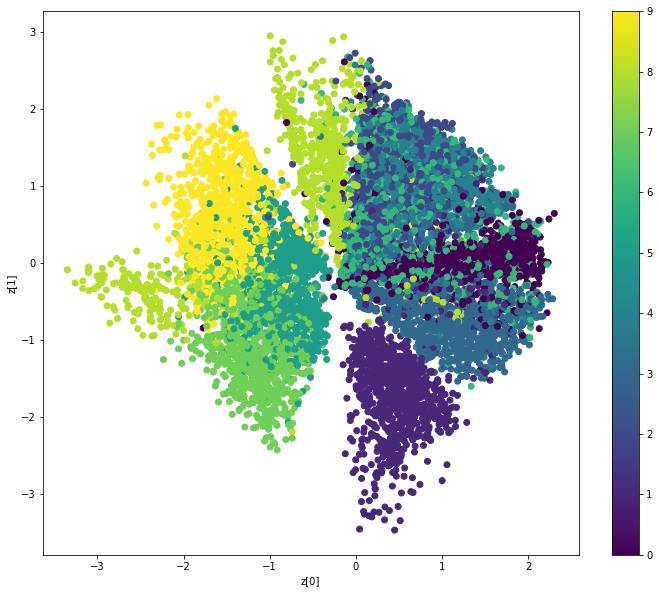

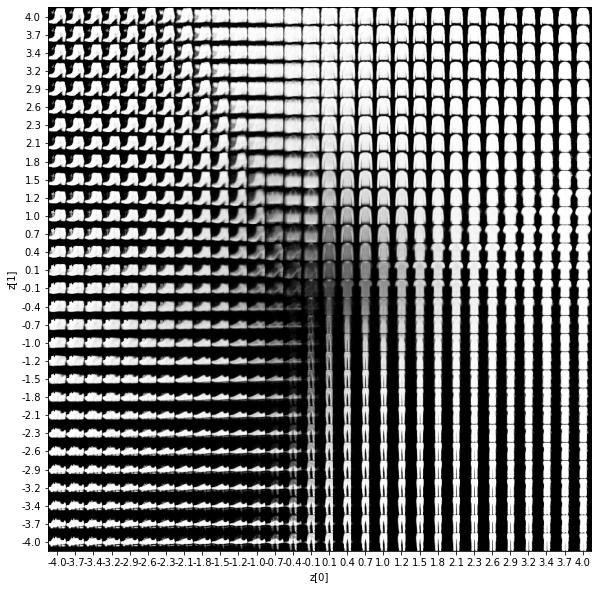

In [40]:
models=(encoder,decoder)
data=(x_test,y_test)
plot_results(models,data,batch_size=batch_size,model_name="vae_mlp")

# Run the networks

Model: "Fully_Connected_NN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
FC_Input_Layer (Flatten)     (None, 784)               0         
_________________________________________________________________
FC_Hidden_Layer_1 (Dense)    (None, 784)               615440    
_________________________________________________________________
FC_Hidden_Layer_2 (Dense)    (None, 512)               401920    
_________________________________________________________________
FC_Hidden_Layer_3 (Dense)    (None, 100)               51300     
_________________________________________________________________
FC_Output_Layer (Dense)      (None, 10)                1010      
Total params: 1,069,670
Trainable params: 1,069,670
Non-trainable params: 0
_________________________________________________________________
None

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 113us/sample -

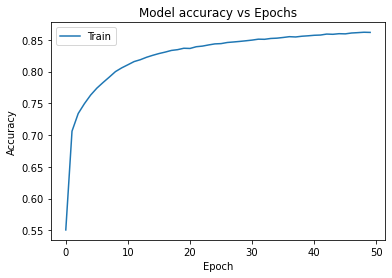

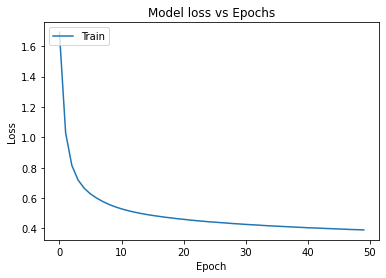

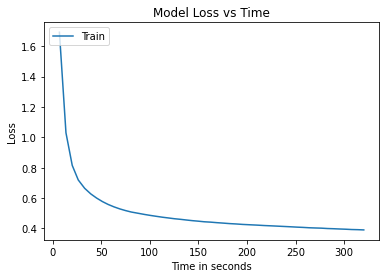

10000/1 - 1s


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,845,2,15,37,6,1,79,0,15,0
Trouser,5,953,6,26,5,0,3,0,2,0
Pullover,21,3,740,10,154,1,63,0,8,0
Dress,33,12,16,857,41,0,37,0,4,0
Coat,0,1,100,30,800,0,64,0,5,0
Sandal,0,0,0,1,0,910,0,57,4,28
Shirt,152,1,127,32,117,0,544,0,27,0
Sneaker,0,0,0,0,0,34,0,927,0,39
Bag,2,1,10,11,3,3,15,5,950,0
Ankle boot,0,0,0,0,0,17,0,47,1,935


In [18]:
# Task 1: Fully Connected Network
run_model(FC_model, x_train_scaled, y_train_cat, x_test_scaled, y_test_cat, class_names)
conf_mat(FC_model, x_test_scaled, y_test)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 5, 5, 40)          1040      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 2, 2, 40)          0         
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               16100     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
Total params: 18,150
Trainable params: 18,150
Non-trainable params: 0
_________________________________________________________________
None

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 37us/sample - loss: 2.0732 -

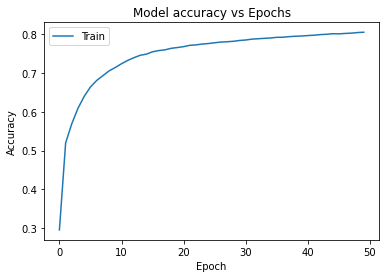

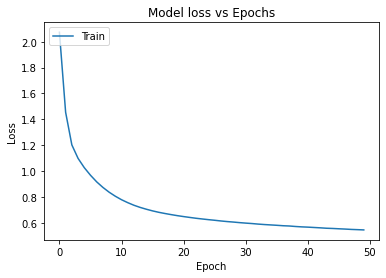

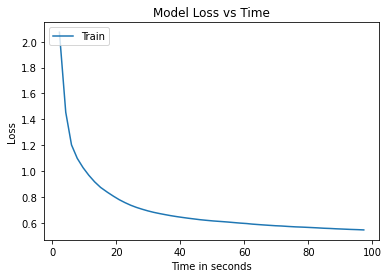

10000/1 - 0s


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,738,0,46,64,10,4,124,0,14,0
Trouser,1,928,9,50,6,0,4,0,2,0
Pullover,14,3,737,17,83,0,140,0,6,0
Dress,31,18,35,830,30,2,47,1,3,3
Coat,7,4,170,40,508,0,266,0,5,0
Sandal,0,0,0,3,0,893,0,67,2,35
Shirt,154,2,133,39,80,0,571,0,21,0
Sneaker,0,0,0,0,0,45,0,871,3,81
Bag,4,2,27,4,5,16,30,6,904,2
Ankle boot,0,0,0,0,1,29,0,52,1,917


In [20]:
# Task 2: Small CNN
run_model(Small_CNN, reshaped_x_train_scaled, y_train_cat, reshaped_x_test_scaled, y_test_cat, class_names)
conf_mat(Small_CNN, reshaped_x_test_scaled, y_test)

Model: "Bigger_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 48)        480       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 96)        41568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 96)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               240100    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

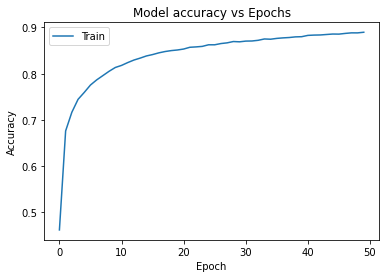

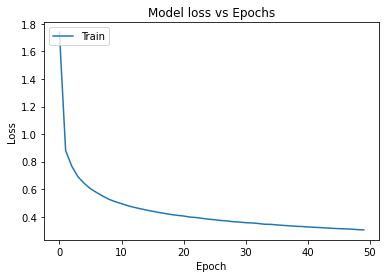

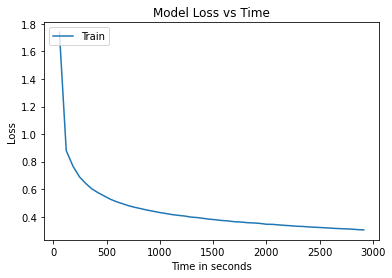

10000/1 - 3s


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,871,2,18,16,10,3,67,0,13,0
Trouser,2,974,0,17,3,0,2,0,2,0
Pullover,15,2,805,9,114,0,48,0,7,0
Dress,23,9,15,875,49,0,25,0,4,0
Coat,1,1,61,22,840,0,69,0,6,0
Sandal,0,0,0,1,0,955,0,29,1,14
Shirt,173,2,94,22,121,0,568,0,20,0
Sneaker,0,0,0,0,0,14,0,962,1,23
Bag,4,1,6,2,6,3,4,4,970,0
Ankle boot,0,0,0,0,0,5,0,45,1,949


In [21]:
# Task 3: Bigger CNN
run_model(bigger_CNN, reshaped_x_train_scaled, y_train_cat, reshaped_x_test_scaled, y_test_cat, class_names)
conf_mat(bigger_CNN, reshaped_x_test_scaled, y_test)

Model: "Own_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 30)        300       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 30)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 30)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5070)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               507100    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 508,410
Trainable params: 508,410
Non-trainable params: 0
_____________________________________________________

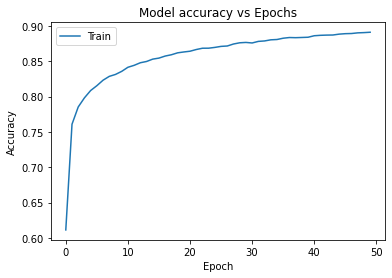

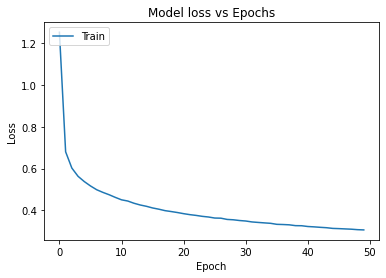

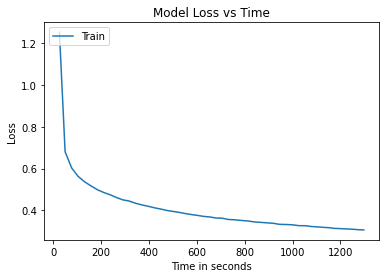

10000/1 - 2s


,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
T-shirt/top,820,0,17,39,6,1,106,0,11,0
Trouser,1,965,0,27,3,0,3,0,1,0
Pullover,14,1,830,11,80,1,58,1,4,0
Dress,12,7,10,911,27,0,29,0,4,0
Coat,1,1,73,28,846,0,50,0,1,0
Sandal,0,0,0,1,0,957,0,30,1,11
Shirt,118,0,84,32,79,0,675,0,12,0
Sneaker,0,0,0,0,0,21,0,947,0,32
Bag,2,2,2,7,2,3,6,6,970,0
Ankle boot,0,0,0,0,0,8,0,40,1,951


In [16]:
# Task 4: own CNN
run_model(own_CNN, reshaped_x_train_scaled, y_train_cat, reshaped_x_test_scaled, y_test_cat, class_names)
conf_mat(own_CNN, reshaped_x_test_scaled, y_test)